\tiny
\scriptsize
\footnotesize
\small
\normalsize
\large
\Large
\LARGE
\huge
\Huge

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from pathlib import Path
import glob, os, re, json
from scipy.stats import linregress
import statistics
def sort_names(image_files):
    file_names = [os.path.basename(string) for string in image_files]
    times = [(float(re.findall("\d+\.\d+", string)[0]), string) for string in file_names]
    times = sorted(times, key=lambda x: x[0])
    print(f"Time: {times[0][0]} -- {times[-1][0]}")
    image_files = [t[1] for t in times]
    return image_files

def give_time(file):
    filename = os.path.basename(file)
    time = re.findall("\d+\.\d+", filename)[0]
    return time

def gradP(slope):
    return slope*997*4.117**2/0.514e-3

def plot_graph(list_x, list_y, names, xtitle, ytitle, image_name, list_x_fill=[], list_y_fill=[], mode=[], \
               dash=['solid', 'dot', 'dash', 'longdash'], \
               colors=['blue', 'red', 'hsv(120,100,100)', 'green', 'black' ], \
               marker_size=15, linesize=2, xrange =[], yrange = [], vertical=None, \
               marker_style = ['circle', 'triangle-up', 'triangle-down','square', 'diamond', 'cross',  'x-thin', 'cross-thin' ], \
               width=1000, height=500, path='./', yanchor='center', y0_anchor=0.01, xanchor='left', x0_anchor=0.3, logx=False, logy=False, 
               font_aspect=1,showlegend=True):
    if mode == []:
        for i in range(len(list_x)):
            mode.append('lines+markers')


    while len(marker_style) < len(list_x):
        marker_style[:] = marker_style[:] + marker_style[:]
    figborderlinesize = 0.7
    legborderlinesize = 0.7
    yaxis = dict(
        tickfont = dict(
            family = 'Times New Roman',
            size = 20*font_aspect,
            color = 'black'
        ),
        titlefont = dict(
            family = 'Times New Roman',
            size = 25*font_aspect,
            color = 'black'
        )
    )
    if logy:
        yaxis['type'] = "log"
    xaxis = dict(
        tickfont = dict(
            family = 'Times New Roman',
            size = 20*font_aspect,
            color = 'black'
        ),
        titlefont = dict(
            family = 'Times New Roman',
            size = 25*font_aspect,
            color = 'black'
        )
    )
    if logx:
        xaxis['type'] = "log"

    axis_style = dict(showline=True, 
                      gridwidth=1, 
                      gridcolor='lightgrey', 
                      linewidth=figborderlinesize, 
                      linecolor='black',
                      mirror=True,
                      ticks='outside',
                      tickfont = dict(family = 'Times New Roman', 
                                      size = 20*font_aspect, 
                                      color = 'black')
                     )
    bg_style = dict(plot_bgcolor = 'rgba(0, 0, 0, 0)',
                paper_bgcolor = 'rgba(255, 255, 255, 0)',
                autosize=False,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0,
                    pad=0.1
                ),
                width = width,
                height = height,
                xaxis_title=xtitle,
                yaxis_title=ytitle,
                yaxis = yaxis,
                xaxis = xaxis,
                font=dict(
                    family="Times New Roman",
                    size=20*font_aspect,
                    color="Black"
                ),
                showlegend=showlegend
               )
    legend_style = dict(
        bgcolor="White",
        bordercolor="Black",
        borderwidth=figborderlinesize,
        yanchor=yanchor,
        y=y0_anchor,
        xanchor=xanchor,
        x=x0_anchor
    )
    
    fig = go.Figure()
    k = len(list_x)
    n_fill = len(list_x_fill)
    if len(list_x_fill) == 2 and len(list_y_fill) == 2:
        fig.add_trace(go.Scatter(x=list_x_fill[1], y=list_y_fill[1], name=names[k+1], mode='lines', fillcolor='blueviolet', line_color='blueviolet', fill='tozeroy')) # fill to trace0 y
        fig.add_trace(go.Scatter(x=list_x_fill[0], y=list_y_fill[0], name=names[k], mode='lines', fillcolor='lightsteelblue',     line_color='indigo', fill='tozeroy')) # fill down to xaxis
    for i,x in enumerate(list_x):
        print('Plot curve number:', i)
        y = np.asarray(list_y[i])
        fig.add_trace(go.Scatter(x=x, y=y, name=names[i],
                                 mode=mode[i],
                                 marker=dict(
                                     size=marker_size,
                                     line=dict(width=linesize)
                                 ),
                                 marker_symbol=marker_style[i],
                                 line=dict(width=linesize, dash=dash[i]),
                                 textfont=dict(
                                     family="Times New Roman",
                                     size=18*font_aspect,
                                     color="LightSeaGreen")
                                 ))
        if colors != []:
            fig['data'][i + n_fill]['marker']['line']['color'] = colors[i]
            fig['data'][i + n_fill]['line']['color'] = colors[i]
    if vertical:
        fig.add_vrect(x0=vertical[0], x1=vertical[1], 
#               annotation_text="decline", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
        
    fig.update_xaxes(axis_style)
    fig.update_yaxes(axis_style)
    fig.update_layout(bg_style)
    fig.update_layout(legend=legend_style)

    if len(xrange) == 2:
        fig.update_xaxes(range=xrange)
    if len(yrange) == 2:
        fig.update_yaxes(range=yrange)
    
    fig.show()
    fn = path + image_name
    print('Write image to file:', fn)
    fig.write_image(str(Path(fn)))
    # fig.write_image(str(Path(fn)), engine="kaleido")
    print("Successfully generated:", fn)

if __name__ == "__main__":
    path = '/Users/weugene/basilisk/work/tube/res27/'
    with open(path + "output_sliced_Rmax_U.json", "r") as f:
        outputs = json.load(f)
        times_del = [7.76]
        rm_i = []
        for t in times_del:
            rm_i.append(outputs['t'].index(t))

        for k, v in outputs.items():
            for i in rm_i:
                v.pop(i)
            outputs[k] = np.array(v)
    
    with open(path + "output_sliced_Rmax_U_cleaned.json", "r") as f:
        outputs2 = json.load(f)
        
    df = pd.read_csv(path + 'for_excel_table.txt', sep=' |\t', header=0)
    tmin = df['t'].values.min()
    tmax = df['t'].values.max()
    fn = "x_nose_mean_tip.png"
    plot_graph([df['t'].values, df['t'].values, outputs['t']], [df['x_nose'].values, df['x_mean'].values, outputs['x_tip']], \
               ['X nose', 'X mean', 'X tip'], \
               dash=['solid', 'dot', 'dash', 'dot'], \
               vertical=[7.34769,7.5],\
               xtitle="$\Large t$", ytitle="$\Large x$", image_name=fn[:-3]+'pdf', mode=['lines', 'lines', 'lines', 'lines'], \
               colors=['red', 'blue', 'black' ], \
               marker_size=1, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='left', x0_anchor=0.01)

#     fn = "u_nose_mean_estim_tip.png"
#     umean_estim = np.diff(df['x_mean'].values)/np.diff(df['t'].values)
#     plot_graph([df['t'].values, df['t'].values, outputs['t']], [np.diff(df['x_nose'].values)/np.diff(df['t'].values), umean_estim, outputs['U_tip']], \
#                ['U nose', 'U mean', 'U tip'], \
#                dash=['solid', 'dot', 'dash'], \
#                xtitle="t", ytitle="U", image_name=fn[:-3]+'pdf', mode=['lines', 'lines', 'lines'], \
#                colors=['red', 'blue', 'black' ], \
#                marker_size=1, width=1000, height=500, path=path, yanchor='bottom', y0_anchor=0.01, xanchor='left', x0_anchor=0.3)


    csvPattern = "slice_t=*.csv"
    csvnames = glob.glob(f'{path}/{csvPattern}', recursive = False)
    csvnames = sort_names(csvnames)
#     print('Found pvd files in:',csvnames)

    list_t = []
    list_unose = []
    # list_umean = []

    for ifile, file in enumerate(csvnames):
        time = give_time(file)
#         print(f'file: {file}, time={time}')
        res = pd.read_csv(path + file, sep = ',', usecols=['Points_0','Points_1','u.x_0','u.x_1','u.x_2','u.x_Magnitude'])
        row = res.iloc[res['Points_0'].idxmax()]
        list_unose.append(row['u.x_0'])
        list_t.append(float(time))
    list_unose = np.asarray(list_unose)
    list_t = np.asarray(list_t)
    
    
    fn = "u_nose_mean_tip_markers.png"
    t_limit=8.4
    tt = np.asarray(outputs['t'])
    args = tt < t_limit
    utip_x = tt[args]
    utip_y = np.asarray(outputs['U_tip'])[args]
    plot_graph([list_t, df['t'].values, utip_x], [list_unose, df['UmeanV'].values, utip_y], \
               ['$\Large U_{\mathrm{nose}}$', '$\Large U_{\mathrm{mean}}$', '$\Large U_{\mathrm{tip}}$'], \
               yrange=[1,2],\
               vertical=[7.34769,7.5],\
               dash=['solid', 'solid', 'solid'], \
               xtitle="$\Large t$", ytitle="$\Large U$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines+markers', 'lines+markers'], \
               colors=['red', 'blue', 'black' ], \
               marker_size=5, width=1000, height=500, path=path, yanchor='bottom', y0_anchor=0.01, xanchor='right', x0_anchor=0.99, logx=False, logy=False)

    # list_unose=np.asarray(list_unose)
    # fn = "u_nose_markers.png"
    # plot_graph([list_t, outputs['t']], [list_unose - 1.6, outputs['U_tip']], \
    #            ['$U_{\\text{nose}} - \\hat{U}$'], \
    #            dash=['solid', 'dot', 'dot'], \
    #            xtitle="t", ytitle='$U_{\\text{nose}} - \\hat{U}$', image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines+markers', 'lines+markers'], \
    #            colors=['red', 'black', 'black' ], \
    #            marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False)


    # print(list_t, list_unose)
    fn = "u_nose_mean_markers_log.png"
    plot_graph([list_t, df['t'].values, outputs['t']], [list_unose, df['UmeanV'].values, outputs['U_tip']], \
#                ['U nose', 'U mean', 'U tip'], \
               ['$\Large U_{\mathrm{nose}}$', '$\Large U_{\mathrm{mean}}$', '$\Large U_{\mathrm{tip}}$'], \
               dash=['solid', 'solid', 'solid'], \
               vertical=[7.34769,7.5],\
               xtitle="$\Large t$", ytitle="$\Large U$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines+markers', 'lines+markers'], \
               colors=['red', 'blue', 'black' ], \
               marker_size=5, width=1000, height=500, path=path, yanchor='bottom', y0_anchor=0.01, xanchor='left', x0_anchor=0.01, logx=True, logy=True)

    # list_unose=np.asarray(list_unose)
    # fn = "u_nose_markers_log.png"
    # plot_graph([list_t], [list_unose - 1.6], \
    #            ['$U_{\\text{nose}} - \\hat{U}$'], \
    #            dash=['solid', 'dot', 'dot'], \
    #            xtitle="t", ytitle='$U_{\\text{nose}} - \\hat{U}$', image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines+markers', 'lines+markers'], \
    #            colors=['red', 'black', 'black' ], \
    #            marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=True, logy=True)


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:185: SyntaxWarning: invalid escape sequence '\L'
<>:185: SyntaxWarning: invalid escape sequence '\L'
<>:226: SyntaxWarning: invalid escape sequence '\L'
<>:226: SyntaxWarning: invalid escape sequence '\L'
<>:226: SyntaxWarning: invalid escape sequence '\L'
<>:230: SyntaxWarning: invalid escape sequence '\L'
<>:230: SyntaxWarning: invalid escape sequence '\L'
<>:248: SyntaxWarning: invalid escape sequence '\L'
<>:248: SyntaxWarning: invalid escape sequence '\L'
<>:248: SyntaxWarning: invalid escape sequence '\L'
<>:251: SyntaxWarning: invalid escape sequence '\L'
<>:251: SyntaxWarning: invalid escape sequence '\L'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:185: SyntaxWarning: invalid escape sequence '\L'
<>:185: SyntaxWarning: invalid escape sequence '\L'
<>:226: SyntaxWarning: invalid escape sequence '\L'
<>:226: SyntaxWa

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weugene/basilisk/work/tube/res27/output_sliced_Rmax_U.json'

In [2]:
ind = list_t > 2
mean_nose=statistics.mean(list_unose[ind])
stdv_nose=statistics.stdev(list_unose[ind])
mean_nose, stdv_nose, stdv_nose/mean_nose

(1.618707512953368, 0.004595303765699289, 0.00283887220447569)

In [173]:
ind = (df['t'].values > 7.45) &(df['t'].values < 8)
mean_mean=statistics.mean(df['UmeanV'].values[ind])
stdv_mean=statistics.stdev(df['UmeanV'].values[ind])
mean_mean, stdv_mean, stdv_mean/mean_mean

(1.5155051803913608, 0.001204862625293662, 0.0007950237589966672)

Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


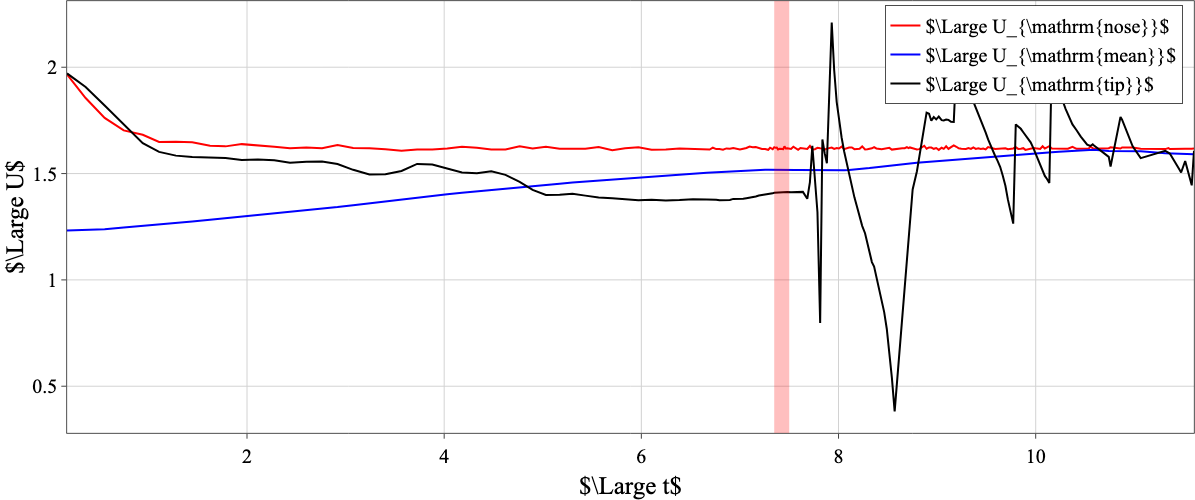

Write image to file: /Users/weugene/basilisk/work/tube/res27/u_nose_mean_tip_markers2.pdf
Successfully generated: /Users/weugene/basilisk/work/tube/res27/u_nose_mean_tip_markers2.pdf


In [5]:
fn = "u_nose_mean_tip_markers2.png"
plot_graph([list_t, df['t'].values, outputs['t']], [list_unose, df['UmeanV'].values, outputs['U_tip']], \
#            ['U nose', 'U mean', 'U tip'], \
           ['$\Large U_{\mathrm{nose}}$', '$\Large U_{\mathrm{mean}}$', '$\Large U_{\mathrm{tip}}$'], \
           dash=['solid', 'solid', 'solid'], \
           vertical=[7.34769,7.5],\
           xtitle="$\Large t$", ytitle="$\Large U$", image_name=fn[:-3]+'pdf', mode=['lines', 'lines', 'lines'], \
           colors=['red', 'blue', 'black' ], \
           marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False)



In [12]:
fn = "u_nose_mean_tip_markers2.png"
# plot_graph([list_t, df['t'].values, outputs['t']], [list_unose, df['UmeanV'].values, outputs['U_tip']], \
# #            ['U nose', 'U mean', 'U tip'], \
#            ['$\Large U_{\mathrm{nose}}$', '$\Large U_{\mathrm{mean}}$', '$\Large U_{\mathrm{tip}}$'], \
#            dash=['solid', 'solid', 'solid'], \
#            vertical=[7.34769,7.5],\
#            xtitle="$\Large t$", ytitle="$\Large U$", image_name=fn[:-3]+'pdf', mode=['lines', 'lines', 'lines'], \
#            colors=['red', 'blue', 'black' ], \
#            marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False)

import matplotlib.pyplot as plt
# import matplotlib as mpl
import numpy as np

# Setting Matplotlib to use LaTeX for text rendering
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


# Assuming list_t, list_unose, df, and outputs are defined as specified by the user.
# For demonstration, I will create dummy data for these variables.
np.random.seed(0)
list_t = np.linspace(0, 10, 100)
list_unose = np.sin(list_t) + np.random.normal(0, 0.1, list_t.shape)
df = {'t': np.linspace(0, 10, 100), 'UmeanV': np.cos(list_t) + np.random.normal(0, 0.1, list_t.shape)}
outputs = {'t': np.linspace(0, 10, 100), 'U_tip': np.sin(list_t) * np.cos(list_t) + np.random.normal(0, 0.1, list_t.shape)}

# Plotting
plt.figure(figsize=(10, 6))

# Line styles and colors
line_styles = ['solid', 'solid', 'solid']
colors = ['red', 'blue', 'black']

# Labels with corrected LaTeX formatting
labels = [r'$U_{\mathrm{nose}}$', r'$U_{\mathrm{mean}}$', r'$U_{\mathrm{tip}}$']

# Plotting the lines
plt.plot(list_t, list_unose, linestyle=line_styles[0], color=colors[0], label=labels[0])
plt.plot(df['t'], df['UmeanV'], linestyle=line_styles[1], color=colors[1], label=labels[1])
plt.plot(outputs['t'], outputs['U_tip'], linestyle=line_styles[2], color=colors[2], label=labels[2])

# Adding vertical lines and filling the area between them
plt.axvline(x=7.34769, color='red', linestyle='--')
plt.axvline(x=7.5, color='red', linestyle='--')
plt.fill_betweenx(y=np.arange(-2, 2, 0.01), x1=7.34769, x2=7.5, color='red', alpha=0.3)

# Titles and labels
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$U$', fontsize=14)
plt.title('Graph of U vs. t', fontsize=16)
plt.legend()

# Saving the plot as a PDF file
image_name = "plot_corrected.pdf"
# plt.savefig(image_name, format='pdf')

# Show plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

<Figure size 720x432 with 1 Axes>

Plot curve number: 0


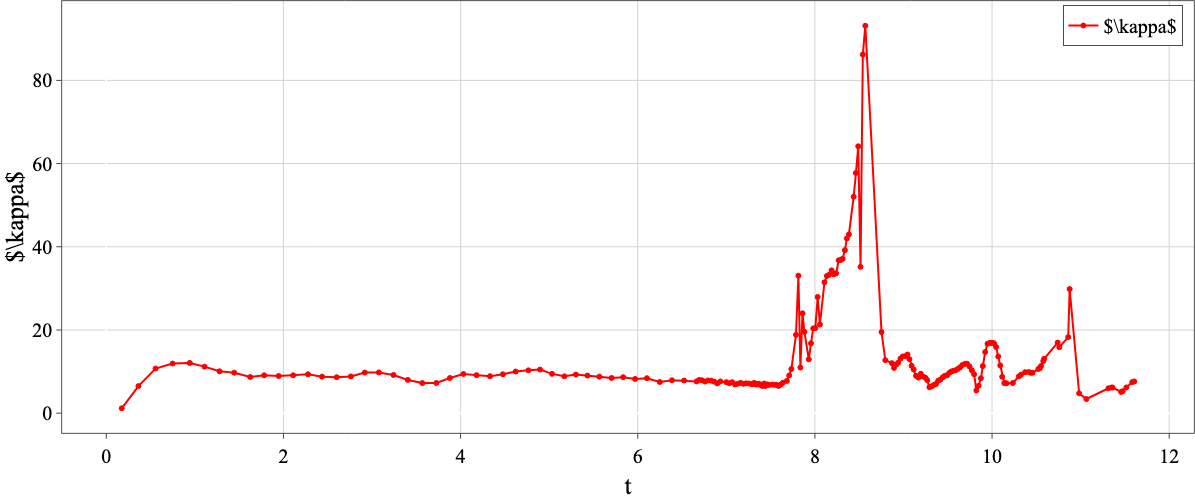

Write image to file: /Users/weugene/basilisk/work/tube/res27/curvature_tip.pdf
Successfully generated: /Users/weugene/basilisk/work/tube/res27/curvature_tip.pdf


In [12]:
fn = "curvature_tip.png"
plot_graph([outputs['t']], [outputs['curvature_tip']], \
           ['$\kappa$'], \
           dash=['solid', 'dot', 'dash'], \
           xtitle="t", ytitle="$\kappa$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines+markers', 'lines+markers'], \
           colors=['red', 'black', 'black' ], \
           marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False)


slope=0.03698093728506057 intercept=0.06951456512756066
Plot curve number: 0
Plot curve number: 1


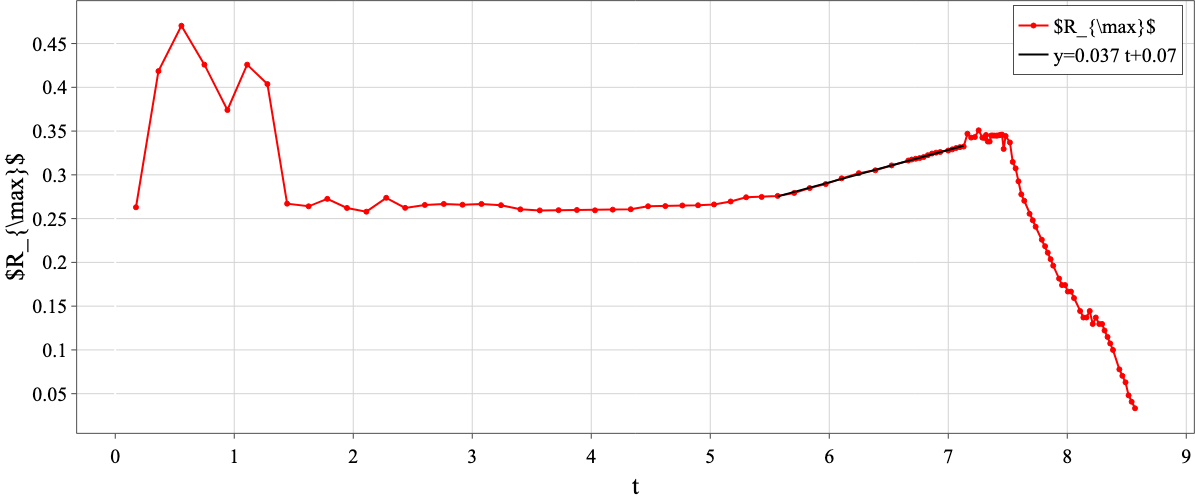

Write image to file: /Users/weugene/basilisk/work/tube/res27/rmax.pdf
Successfully generated: /Users/weugene/basilisk/work/tube/res27/rmax.pdf


In [92]:
fn = "rmax.png"
ind = (outputs['t'] > 5.56) & (outputs['t'] < 7.13)
slope, intercept, r, p, se = linregress(outputs['t'][ind], outputs['rmax'][ind])
print(f"slope={slope} intercept={intercept}")
xx = np.linspace(outputs['t'][ind].min(), outputs['t'][ind].max())
yy = slope*xx + intercept
plot_graph([outputs['t'], xx], [outputs['rmax'], yy], \
           ['$R_{\max}$', f'y={slope:0.3f} t+{intercept:0.2f}'], \
           dash=['solid', 'solid', 'dash'], \
           xtitle="t", ytitle="$R_{\max}$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines', 'lines+markers'], \
           colors=['red', 'black', 'black' ], \
           marker_size=5, width=1000, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False)


In [ ]:
{"t": [1.10827, 1.27861, 1.62507, 2.27704], "curvature_tip": [11.69990077360389, 10.46155854043738, 8.129304327606713, 9.484951543097077], "U_tip": [1.60205, 1.58437, 1.57448, 1.56208], "x_tip": [0.8362500000000002, 0.9382700000000002, 1.1131600000000001, 1.4290000000000003], "rmax": [0.335697, 0.318533, 0.251163, 0.259031]}

slope=-1.0443076469721542 intercept=14.648879079001363
slope=0.03698093728506057 intercept=0.06951456512756066


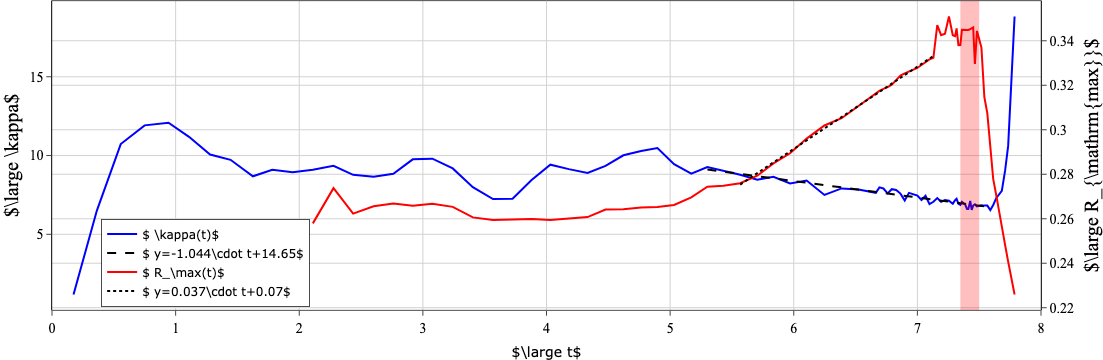

Write image to file: /Users/weugene/basilisk/work/tube/res27/Rmax_curvature.pdf


In [175]:
import plotly.graph_objects as go
font_aspect = 1
font_legend=12
title_font=15
width = 800
yanchor = 'bottom'
y0_anchor = 0.01
xanchor = 'left'
x0_anchor = 0.05
xtitle = '$\large t$'
ytitlel = "$\large \kappa$"
ytitler = "$\large R_{\mathrm{max}}$"
fsize = ""

fig = go.Figure()

ind = (outputs['t'] > 5.29) & (outputs['t'] < 7.58)
slope, intercept, r, p, se = linregress(outputs['t'][ind], outputs['curvature_tip'][ind])
print(f"slope={slope} intercept={intercept}")
xx = np.linspace(outputs['t'][ind].min(), outputs['t'][ind].max())
yy = slope*xx + intercept

ind = outputs['t'] < 7.81
fig.add_trace(go.Scatter(
    x=outputs['t'][ind],
    y=outputs['curvature_tip'][ind],
    name=f"${fsize} \kappa(t)$",
    mode='lines',
    marker=dict(
        size=5,
        line=dict(width=1)),
    marker_symbol='circle',
    line=dict(width=2, dash='solid', color='blue'),
))
fig.add_trace(go.Scatter(
    x=xx,
    y=yy,
    name=f'${fsize} y={slope:0.3f}\cdot t+{intercept:0.2f}$',
    mode='lines',
    marker=dict(
        size=5,
        line=dict(width=1)),
    marker_symbol='circle',
    line=dict(width=2, dash='dash', color='black'),
))

ind = (outputs['t'] > 5.56) & (outputs['t'] < 7.13)
slope, intercept, r, p, se = linregress(outputs['t'][ind], outputs['rmax'][ind])
print(f"slope={slope} intercept={intercept}")
xx = np.linspace(outputs['t'][ind].min(), outputs['t'][ind].max())
yy = slope*xx + intercept

ind = (outputs['t'] > 2 ) & (outputs['t'] < 7.8) #7.25
fig.add_trace(go.Scatter(
    x=outputs['t'][ind],
    y=outputs['rmax'][ind],
    name='$' + f'{fsize}' + ' R_\max(t)$',
    yaxis="y2",
    mode='lines',
    marker=dict(
        size=5,
        line=dict(width=1)),
    marker_symbol='circle',
    line=dict(width=2, dash='solid', color='red'),
))

fig.add_trace(go.Scatter(
    x=xx,
    y=yy,
    name=f'${fsize} y={slope:0.3f}\cdot t+{intercept:0.2f}$',
    yaxis="y2",
    mode='lines',
    marker=dict(
        size=5,
        line=dict(width=1)),
    marker_symbol='circle',
    line=dict(width=2, dash='dot', color='black'),
))
vertical=[7.34769,7.5]
fig.add_vrect(x0=vertical[0], x1=vertical[1], 
#               annotation_text="decline", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

vlines=False
vert_time=[7.34769, 7.40156, 7.42752, 7.51797, 7.93105]
if vlines:
    for time in vert_time:
        fig.add_vline(x=time, line_width=1, line_dash="dash", line_color="grey")
# Create axis objects
fig.update_layout(
    xaxis=dict(
        title=xtitle,
        domain=[0.7, 0.3]
    ),
    yaxis=dict(
        title=ytitlel,
        titlefont=dict(
            color="blue", 
#             size=10
        ),
        tickfont=dict(
            color="blue"
        )
    ),
    yaxis2=dict(
        title=ytitler,
        titlefont=dict(
            color="red", 
#             size=10
        ),
        tickfont=dict(
            color="red"
        ),
        anchor="x",
        overlaying="y",
        side="right",
#         position=0.1
    ),
)


figborderlinesize = 0.7
legborderlinesize = 0.7
axis_style = dict(showline=True, 
                  gridwidth=1, 
                  gridcolor='lightgrey', 
                  linewidth=figborderlinesize, 
                  linecolor='black',
                  mirror=True,
                  ticks='outside',
                  tickfont = dict(
#                                   family = 'Times New Roman', 
                                  size = 20*font_aspect, 
#                                   color = 'black'
                  ),
                  titlefont = dict(
#                                   family = 'Times New Roman', 
                                   size = title_font, 
#                                    color = 'black'
                  )
                 )
bg_style = dict(plot_bgcolor = 'rgba(0, 0, 0, 0)',
            paper_bgcolor = 'rgba(255, 255, 255, 0)',
            autosize=False,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=0.1
            ),
            width = width,
#             height = height,
            xaxis_title=xtitle,
            font=dict(
#                 family="Times New Roman",
                size=font_legend,
                color="Black"
            ),
            showlegend=True
           )
legend_style = dict(
    bgcolor="White",
    bordercolor="Black",
    borderwidth=figborderlinesize,
    yanchor=yanchor,
    y=y0_anchor,
    xanchor=xanchor,
    x=x0_anchor
)
axis_style = dict(showline=True, gridwidth=1, gridcolor='lightgrey', 
                  linewidth=figborderlinesize, 
                  linecolor='black', 
                  mirror=True,
                  ticks='outside', 
                  tickfont = dict(family = 'Times New Roman', size = 14, color = 'black'),
                  titlefont = dict(family = 'Times New Roman', size = 20, color = 'black')
            )

fig.update_xaxes(axis_style)
fig.update_yaxes(axis_style)
fig.update_layout(bg_style)
fig.update_layout(legend=legend_style)

fig.update_xaxes(range=[0,8])


fig.show()
if vlines:
    fn = path + 'Rmax_curvature_with_vlines.pdf'
else:
    fn = path + 'Rmax_curvature.pdf'
print('Write image to file:', fn)
fig.write_image(str(Path(fn)))

In [207]:
df_line = pd.read_csv(path + 'pressure_line_extracted_y=0.01.csv', sep=',', header=0)

ind = (df_line['Points_2'].values > 11.19) & (df_line['Points_2'].values < 12.63)
slope, intercept, r, p, se = linregress(df_line['Points_2'].values[ind], df_line['p'].values[ind])
print(f"slope={slope} intercept={intercept}, gradP={gradP(slope)}")
xx = np.linspace(df_line['Points_2'].values[ind].min(), df_line['Points_2'].values[ind].max())
yy = slope*xx + intercept


# indr = (df_line['Points_2'].values < 4) | (df_line['Points_2'].values > 22.8)
indr = (df_line['Points_2'].values > 22.8)
sloper, interceptr, r2, p2, se2 = linregress(df_line['Points_2'].values[indr], df_line['p'].values[indr])
print(f"slope={sloper} intercept={interceptr}, gradP={gradP(sloper)}")
xxr = np.linspace(df_line['Points_2'].values[indr].min(), df_line['Points_2'].values[indr].max())
yyr = sloper*xxr + interceptr

indl = (df_line['Points_2'].values < 4)
slopel, interceptl, r3, p3, se3 = linregress(df_line['Points_2'].values[indl], df_line['p'].values[indl])
print(f"slope={slopel} intercept={interceptl}, gradP={gradP(slope3)}")
xxl = np.linspace(df_line['Points_2'].values[indl].min(), df_line['Points_2'].values[indl].max())
yyl = slopel*xxl + interceptl


xxm = np.linspace(0,30)
yym = slopel*xxm + interceptl+0.018

slope=-0.016549538951983474 intercept=0.5832851613673314, gradP=-544101.1862150142
slope=-0.012970114715093685 intercept=0.3894905350516874, gradP=-426420.02428602346
slope=-0.013932271217647346 intercept=0.37306592934488536, gradP=-458052.95955285116


Plot curve number: 0
Plot curve number: 1
Plot curve number: 2


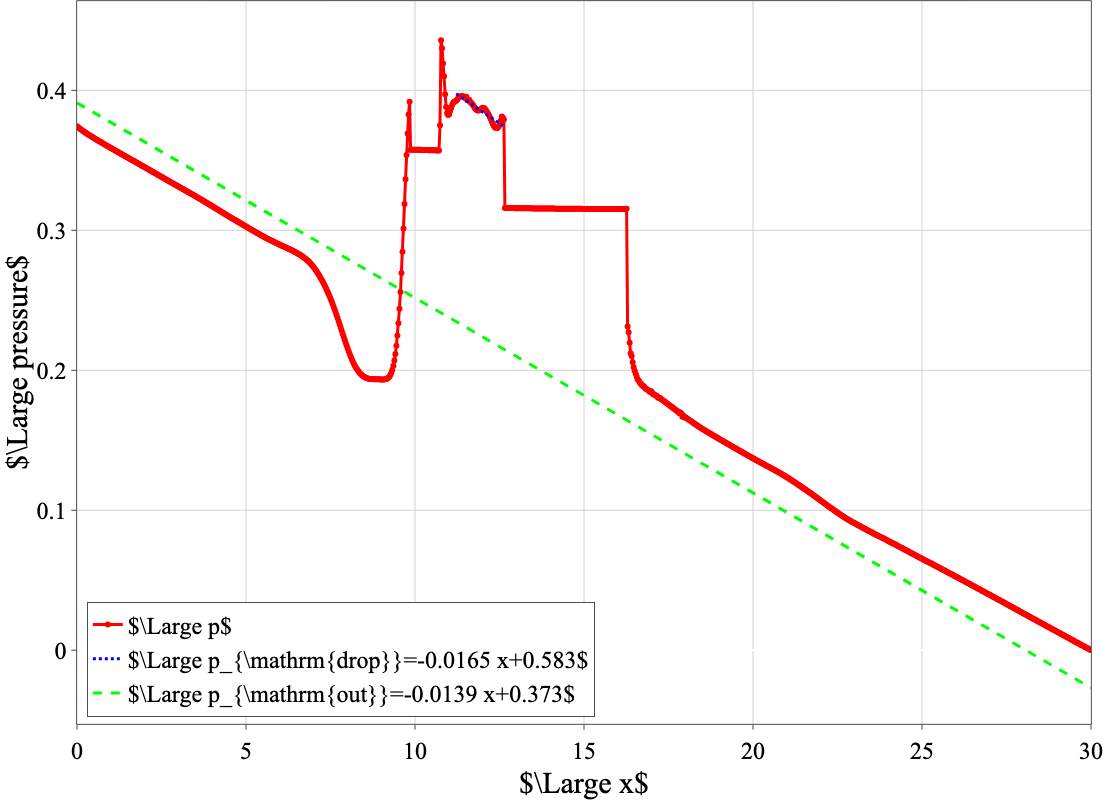

Write image to file: /Users/weugene/basilisk/work/tube/res27/pressure_line_extracted.pdf
Successfully generated: /Users/weugene/basilisk/work/tube/res27/pressure_line_extracted.pdf
Plot curve number: 0
Plot curve number: 1


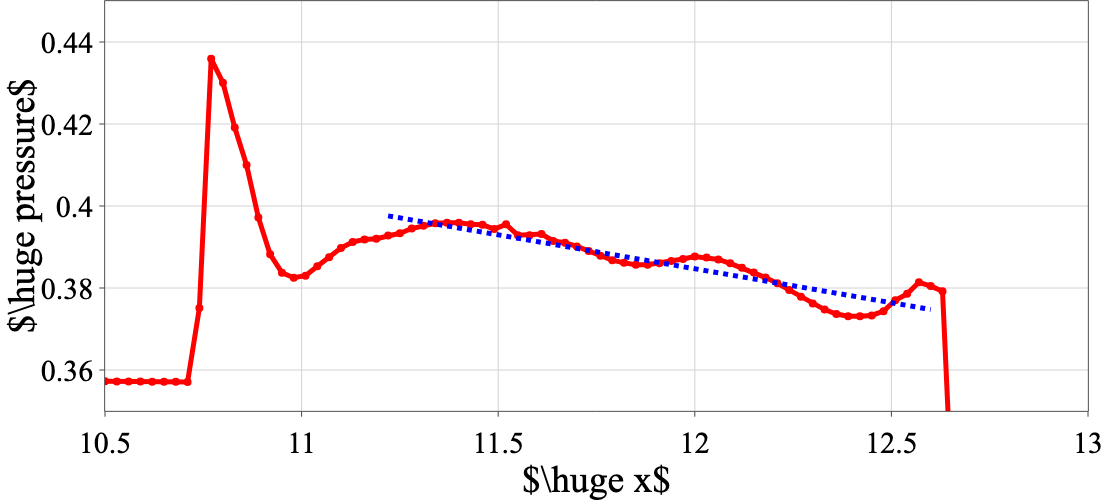

Write image to file: /Users/weugene/basilisk/work/tube/res27/pressure_line_extracted_zoomin.pdf
Successfully generated: /Users/weugene/basilisk/work/tube/res27/pressure_line_extracted_zoomin.pdf


In [220]:
fn = "pressure_line_extracted.png"
plot_graph([df_line['Points_2'].values, xx, xxm], [df_line['p'].values, yy, yym], \
#                ['U nose', 'U mean', 'U tip'], \
           ['$\Large p$', '$\Large p_{\mathrm{drop}}' + f'={slope:0.4f} x+{intercept:0.3f}$', '$\Large p_{\mathrm{out}}' + f'={slopel:0.4f} x+{interceptl:0.3f}$'], \
           xrange=[0,30],yrange=[],\
           dash=['solid', 'dot', 'dash', 'dash'], \
           vertical=[],\
           xtitle="$\Large x$", ytitle="$\Large pressure$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines', 'lines', 'lines'], \
           colors=['red', 'blue', 'hsv(120,100,100)' ], \
           marker_size=3, linesize=3, width=800, height=800, path=path, yanchor='bottom', y0_anchor=0.01, xanchor='left', x0_anchor=0.01, logx=False, logy=False, font_aspect=1.2)

fn = "pressure_line_extracted_zoomin.png"
plot_graph([df_line['Points_2'].values, xx], [df_line['p'].values, yy], \
#                ['U nose', 'U mean', 'U tip'], \
           ['$\huge p$', f'$\huge y={slope:0.3f}\cdot t+{intercept:0.2f}$'], \
           xrange=[10.5,13],yrange=[0.35,0.45],\
           dash=['solid', 'dot', 'solid'], \
           vertical=[],\
           xtitle="$\huge x$", ytitle="$\huge pressure$", image_name=fn[:-3]+'pdf', mode=['lines+markers', 'lines', 'lines+markers'], \
           colors=['red', 'blue', 'black' ], \
           marker_size=3, linesize=5, width=800, height=500, path=path, yanchor='top', y0_anchor=0.99, xanchor='right', x0_anchor=0.99, logx=False, logy=False, font_aspect=1.5, showlegend=False)


In [75]:
ind2 = (df_line['Points_2'].values > 10.5) & (df_line['Points_2'].values < 11)

df_line['Points_2'].values[ind2]

array([10.52999973, 10.56000042, 10.59000015, 10.61999989, 10.64999962,
       10.68000031, 10.71000004, 10.73999977, 10.77000046, 10.80000019,
       10.82999992, 10.85999966, 10.89000034, 10.92000008, 10.94999981,
       10.97999954])

In [76]:
df_line['p'].values[ind2]

array([0.35721266, 0.35719419, 0.35717559, 0.35715592, 0.35713366,
       0.35710788, 0.35708302, 0.42329636,        nan, 0.42755166,
       0.41780162, 0.40692484, 0.39370269, 0.38470143, 0.38047141,
       0.37918124])

In [131]:
0.016549538951983474*1000*4.117**2/0.514e-3

545738.401419272

In [157]:
# delta P/L = 8 \mu Q/\pi R^4 = 8 \mu Umean/R^2
8*0.88e-3*4.117/(0.514e-3/2)**2

438820.8754106799

In [177]:
ind = (df_line['Points_2'].values > 12.06) & (df_line['Points_2'].values < 12.36)
slope, intercept, r, p, se = linregress(df_line['Points_2'].values[ind], df_line['p'].values[ind])
print(f"slope={slope} intercept={intercept}")

slope=-0.04625970255458393 intercept=0.9454989571998036


In [169]:
0.047*1000*4.117**2/0.514e-3

1549874.2859922177

In [180]:
ind = (df_line['Points_2'].values < 6.3) | (df_line['Points_2'].values > 17.4)
slope, intercept, r, p, se = linregress(df_line['Points_2'].values[ind], df_line['p'].values[ind])
print(f"slope={slope} intercept={intercept}, gradP={slope*1000*4.117**2/0.514e-3}")

slope=-0.012074219399991088 intercept=0.36977086840031387, gradP=-398160.04620158667
